https://stackoverflow.com/questions/24183101/pandas-bar-plot-with-two-bars-and-two-y-axis?noredirect=1&lq=1

Using the new pandas release (0.14.0 or later) the below code will work. To create the two axis I have manually created two matplotlib axes objects (ax and ax2) which will serve for both bar plots.

When plotting a Dataframe you can choose the axes object using ax=.... Also in order to prevent the two plots from overlapping I have modified where they align with the position keyword argument, this defaults to 0.5 but that would mean the two bar plots overlapping.

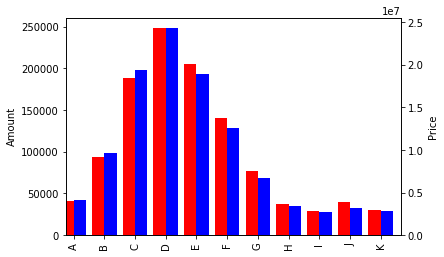

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO

s = StringIO("""     amount     price
A     40929   4066443
B     93904   9611272
C    188349  19360005
D    248438  24335536
E    205622  18888604
F    140173  12580900
G     76243   6751731
H     36859   3418329
I     29304   2758928
J     39768   3201269
K     30350   2867059""")

df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df.amount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
df.price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Amount')
ax2.set_ylabel('Price')

plt.show()

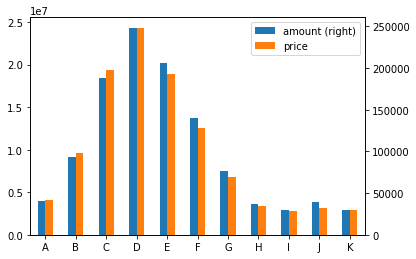

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
s = StringIO("""     amount     price
A     40929   4066443
B     93904   9611272
C    188349  19360005
D    248438  24335536
E    205622  18888604
F    140173  12580900
G     76243   6751731
H     36859   3418329
I     29304   2758928
J     39768   3201269
K     30350   2867059""")
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

_ = df.plot( kind= 'bar' , secondary_y= 'amount' , rot= 0 )
plt.show()

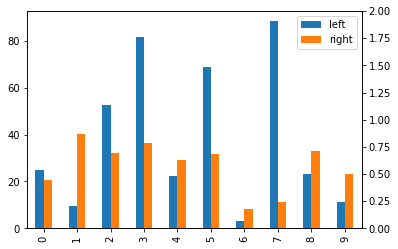

In [3]:
import pylab as pl
df = pd.DataFrame(np.random.rand(10, 2), columns=["left", "right"])
df["left"] *= 100

ax = df.plot(kind="bar")
ax2 = ax.twinx()
for r in ax.patches[len(df):]:
    r.set_transform(ax2.transData)
ax2.set_ylim(0, 2);